#Sayings of the Desert Fathers, an Imagined Network

##Alexandria Vawter

Necessary Python Packages
 - pip install jupyter
 - pip install numpy pandas matplotlib
 - pip install lxml
 - pip folium
 

#Imports

In [11]:
#importing pandas, element tree, url request, and pprint
import pandas as pd
import numpy as np

from lxml import etree
from lxml.etree import fromstring

import requests
import io
from io import StringIO, BytesIO

from pprint import pprint 

In [12]:
#import mapping/graphing 
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

tls.set_credentials_file(
        username="allievawter", 
        api_key="KIWfIxINkenjTcljA0yw")

#Load Files from Github

In [13]:
#load xml
r = requests.get('https://raw.githubusercontent.com/alexvawter/dh-course-fall-2017/master/isaw-final/sodf-1.xml')

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /alexvawter/dh-course-fall-2017/master/isaw-final/sodf-1.xml (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x10de40898>: Failed to establish a new connection: [Errno 60] Operation timed out',))

In [ ]:
#Preview xml text
print(r.text[:1500])

In [ ]:
#load refs/names csv
url="https://raw.githubusercontent.com/alexvawter/dh-course-fall-2017/master/isaw-final/sodf-refs.csv"
s=requests.get(url).content
names=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
#load places csv
url="https://raw.githubusercontent.com/alexvawter/dh-course-fall-2017/master/isaw-final/sodf-places.csv"
s=requests.get(url).content
places=pd.read_csv(io.StringIO(s.decode('utf-8')))

#Create ElementTree

In [ ]:
#create element tree with lxml
#so it can be searched effectively with xquery/xpath/pandas
root = etree.fromstring(r.content)

In [8]:
#because I am working with xml here, 
#there is often a namespace that is required in every search
#This set of code parses the Element Tree created above
#and removes the namespace, here: {http://www.tei-c.org/ns/1.0}

it = etree.iterparse(BytesIO(r.content))
for _, el in it:
    if '}' in el.tag:
        el.tag = el.tag.split('}', 1)[1] 
    if '}' in el.attrib:
        el.attrib = el.tag.attrib.split('}', 1)[1]
root = it.root

#Who is in the text?

##Names

In [11]:
#each monk, anonymous, and named person 
#has been tagged in the xml with a <persName> tag
persons = []
for persName in root.findall('.//persName'):
    text = persName.text
    if text is not None:
        persons.append(text)
print(persons[:30])

['Anthony', 'Anthony', 'Anthony', 'Anthony', 'Anthony', 'Anthony', 'Anthony', 'Poemen', 'Pambo', 'Anthony', 'Anthony', 'Some brothers', 'Anthony', 'hunter', 'Anthony', 'Anthony', 'Anthony', 'Anthony', 'Anthony', 'Anthony', 'Anthony', 'Anthony', 'Anthony', 'Joseph', 'Joseph', 'Anthony', 'Joseph', 'Anthony', 'Anthony', 'Anthony']


##Number of Mentions

In [12]:
#make a list from the function above
#in order to count the number of times a specific monk is mentioned
#Anthony
ln = []
for persName in root.findall('.//persName'):
    text = persName.text
    if text is not None:
        ln.append(text)
ln.count('Anthony')

64

In [13]:
#Elias
ln = []
for persName in root.findall('.//persName'):
    text = persName.text
    if text is not None:
        ln.append(text)
ln.count('Elias')

6

In [14]:
#create a dictionary
#to list all names and number of mentions
d = {}
for i in ln:
    d[i] = ln.count(i)
print (d)

{'Anthony': 64, 'Poemen': 213, 'Pambo': 23, 'Some brothers': 2, 'hunter': 1, 'Joseph': 16, 'Elias': 6, 'Doulas': 1, 'Bessarion': 13, 'man possessed with a devil': 1, 'brother': 1, 'one of the brethren': 1, 'Benjamin': 3, 'his sons': 1, 'Daniel': 13, 'A brother': 3, 'The devil': 1, 'Ammoes': 2, 'Arsenius': 4, 'Cyril': 1, 'Zeno': 11, 'Egyptian brother': 1, 'the Faster': 1, 'Macarius': 69, 'Zacharias': 12, 'Moses': 5, 'Isidore': 10, 'old men': 1, 'Agathon': 3, 'Saba': 1, 'Theodore ': 1, 'Theodore of Pherme': 5, 'Theodore': 16, 'a brother': 1, 'Theodore of Enaton': 2, 'Lucius': 3, 'Abraham of ': 1, 'Theodore of ': 1, 'Another old man': 1, 'Theophilus': 7, 'John': 6, 'Hilarion': 2, 'Cassian': 1, 'Cyrus': 1, 'Longinus': 7, 'Matoes': 15}


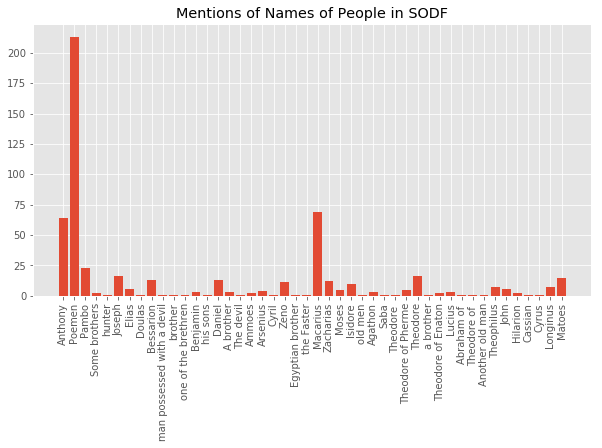

In [15]:
#plot the names + number of mentions on a bar graph
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

plt.figure(figsize=(10,5))
plt.title('Mentions of Names of People in SODF')
plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()), rotation=90,)

plt.show()

##What Are They Saying?

#first we need to find their reference numbers

In [16]:

#each <persName> element has a ref="" attribute containing an id
#that is used within the attributes of multiple elements (like <q who="">)
#to refer to that same person throughout the text
#the id/name pairs are stored in a csv we called earlier
names.iloc[:15]

,ref,name
0,m1,Anthony
1,m2,Bessarion
2,m3,Benjamin
3,m4,Daniel
4,m5,Zeno
5,m6,Zacharias
6,m7,Elias
7,m8,Theodore of Pherme
8,m9,Theodore of Enaton
9,m10,Theodore of Eleutheropolis


#then find some sayings

In [17]:
#create a dictionary
#of quotes marked in the xml by the <q> element and who was speaking
#each <q> element has the attribute who="" which contains an id
#e.g. <q who="m1"> that is equivalent to the dataframe above

#then append this dicitonary to a dataframe called sayings

sayings = pd.DataFrame()
for q in root.findall('.//q'):
    quotes = {'ref':q.get('who'),'quote':q.text}
    sayings = sayings.append(quotes,ignore_index=True)
sayings.iloc[:11]

,quote,ref
0,"'Lord, I want to be saved but these thoughts ...",m1
1,"'Lord, how is it that some die when they are y...",m1
2,'Pay attention to what I tell you: whoever you...,m1
3,'This is the great work of a man: always to ta...,m1
4,'Put an arrow in your bow and shoot it.',m1
5,"'Shoot yet again,'",m1
6,'If I bend my bow so much I will break it.',a1
7,'It is the same with the work of God. If we st...,m1
8,'You have not understood it.',m1
9,'How would you explain this saying?',m1


In [18]:
#because the <q> element only preserved the id and not the name,
#the id needs to be merged with the names dataframe 
#so that information can be accessed 
df1 = sayings.merge(names, on="ref", how = 'inner')
df1.iloc[:11]

,quote,ref,name
0,"'Lord, I want to be saved but these thoughts ...",m1,Anthony
1,"'Lord, how is it that some die when they are y...",m1,Anthony
2,'Pay attention to what I tell you: whoever you...,m1,Anthony
3,'This is the great work of a man: always to ta...,m1,Anthony
4,'Put an arrow in your bow and shoot it.',m1,Anthony
5,"'Shoot yet again,'",m1,Anthony
6,'It is the same with the work of God. If we st...,m1,Anthony
7,'You have not understood it.',m1,Anthony
8,'How would you explain this saying?',m1,Anthony
9,"'Indeed, Abba",m1,Anthony


#Now find a saying of a specific person:

In [19]:
#The sayings of Zeno
#This can be done with the id of any person!
zeno = df1.loc[df1['ref'] == 'm5', ]
pd.set_option('display.max_colwidth', -1)
zeno.quote.str.strip()

46    'Do not live in a famous place, do not settle close to a man with a great name, and do not lay foundations for building yourself a cell one day.'                                                                                                                              
47    'What shall I do, since those who bring things are hurt just as much as those who wish to receive something?\n        I know what seems right to me: when someone brings me something, I will accept it and I will give it to anyone who asks me for something.'               
48    'The Egyptians hide the virtues they possess and ceaselessly accuse themselves of faults they do not have, while the Syrians and Greeks pretend to have virtues they do not have, and hide the faults of which they are guilty.'                                               
49    'The brothers have passed over their sins and inquired about heavenly things. This is the interpretation of this saying: "God alone is pure," therefore he said,

In [20]:
#The sayings of the anonymous hunter
pd.set_option('display.max_colwidth', -1)
hunter = df1.loc[df1['ref'] == 'a1', ]
print (hunter.quote)

10    'If I bend my bow so much I will break it.'
Name: quote, dtype: object


##Conversations?

In [21]:
#To whom are they saying these things?
#a <relation> element preserves conversations with the type="" attribute
#first new dataframe from dictionary of relationships (rels)

rels = pd.DataFrame()
for relation in root.findall('.//relation'):
    attrib = relation.attrib    
    data = dict(attrib)
    rels = rels.append(data,ignore_index=True)
rels = rels[['active','type','passive','name']]
rels[:11]

,active,type,passive,name
0,m1,said-to,m23,monk
1,g3,visited,m1,vistor
2,m2,conversation,m26,monk
3,m2,traveled-to,p2,traveler
4,m2,lived-in,p1,resident
5,m2,conversation,a3,monk
6,m2,conversation,a4,monk
7,m3,said-to,a5,monk
8,m4,conversation,a5,monk
9,m4,conversation,m27,monk


In [22]:
#different kinds of relationships have been preserved in the xml
#but the "conversation" type can answer
#To whom are they saying these things?
#a new dataframe name conv (conversations) will pull the type info 
#from the relationship dataframe above
conv = rels.loc[rels['type'] == 'conversation']
conv[:11]

,active,type,passive,name
2,m2,conversation,m26,monk
5,m2,conversation,a3,monk
6,m2,conversation,a4,monk
8,m4,conversation,a5,monk
9,m4,conversation,m27,monk
10,m4,conversation,n1,monk
13,m5,conversation,a8,monk
16,m5,conversation,a9,monk
18,m6,conversation,m23,monk
19,m6,conversation,"m30,m23,m13",monk


In [23]:
#what about the lived-in or visted relationships?
#a new dataframe name pla (places) will pull that type info 
#from the relationship dataframe above
vis = rels.loc[rels['type'] == 'visited'],
trav = rels.loc[rels['type'] == 'traveled-to'],
liv = rels.loc[rels['type'] == 'lived-in']

#all are callable but here is the lived-in relationship
liv

,active,type,passive,name
4,m2,lived-in,p1,resident
11,m5,lived-in,p4,resident
14,m5,lived-in,p1,resident
21,m7,lived-in,p8,resident
24,m8,lived-in,p9,resident
26,m8,lived-in,p1,resident
28,m29,lived-in,p6,resident
29,m10,lived-in,p7,resident
31,m15,lived-in,p8,resident
33,m21,lived-in,p8,resident


you'll notice in the 'passive' column of the chart above, there is a new id = p.

In [24]:
#the id/name pairs for 'p'ids are stored in a csv we called earlier
places.iloc[:15]

,ref,name,lat,long
0,p1,Scetis,30.350000,30.200000
1,p2,Lycopolis,31.500000,30.570000
2,p4,Syria,37.500000,37.500000
3,p5,Palestine,32.500000,37.500000
4,p6,Iberia,41.836468,44.689138
5,p7,Eleutheropolis,31.612320,34.891945
6,p8,Egypt,30.200000,31.130000
7,p9,Pherme,30.776003,30.368868


##Map the monks

In [25]:
#make a list of locations using the lat and long columns
locations = places[['lat', 'long']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[30.776003000000003, 30.368868]

In [26]:
#use folium to make a map
import folium
map = folium.Map([37.1625575, 38.781432], tiles='CartoDB Positron', zoom_start=7)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], places['name'][point]).add_to(map)
map
                  